In [1]:
import keras 
from keras import layers

In [2]:
encoding_dim=32 

In [3]:
input_img=keras.Input(shape=(784,))

In [4]:
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)

In [5]:
decoded=layers.Dense(784,activation='sigmoid')(encoded)

In [6]:
autoencoder=keras.Model(input_img,decoded)

In [7]:
encoder=keras.Model(input_img,encoded)

In [8]:
encoded_input=keras.Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np
(x_train,_),(x_test, _) = mnist.load_data()

In [11]:
x_train=x_train.astype('float32')/ 255
x_test= x_test.astype('float32')/ 255
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train,x_train,
                 epochs=50,
                 batch_size=256,
                 shuffle=True,
                 validation_data=(x_test,x_test))
                

Epoch 1/50
235/235 [==============================] - 5s 15ms/step - loss: 0.2720 - val_loss: 0.1870
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1694 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1439 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1282 - val_loss: 0.1206
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1175 - val_loss: 0.1117
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1100 - val_loss: 0.1056
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1048 - val_loss: 0.1014
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1012 - val_loss: 0.0984
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0986 - val_loss: 0.0963
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0969 - val_lo

In [14]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


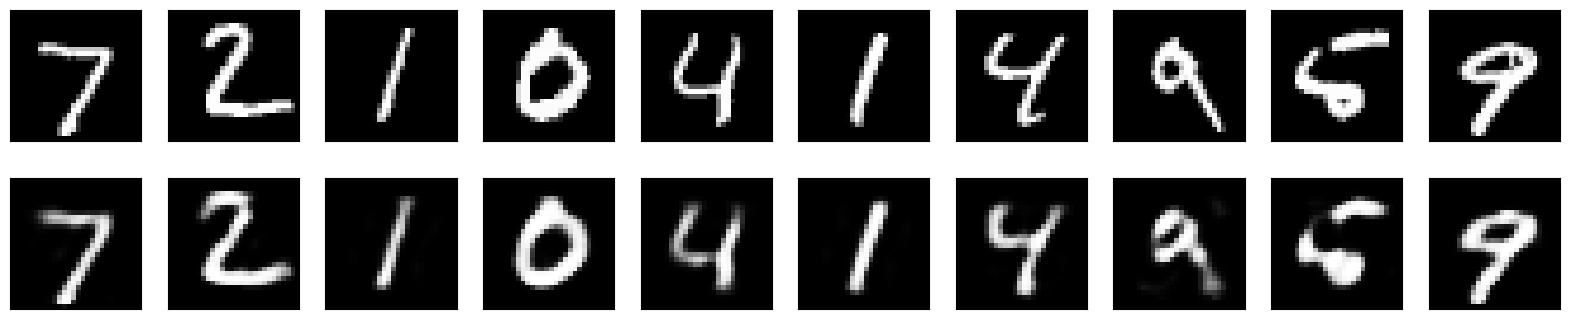

In [15]:
import matplotlib.pyplot as plt
n=10 
plt.figure(figsize=(20,4))
for i in range(n):
        ax=plt.subplot(2,  n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax=plt.subplot(2, n ,i + 1+ n)
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()